## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
print(df.describe())
print(df.shape)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
target = df['y']
le = LabelEncoder()
target = le.fit_transform(target)

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
for col in bank_client.columns:
    print(f"{col}: {bank_client[col].unique()}")

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Max age: 98
Min age: 17
0


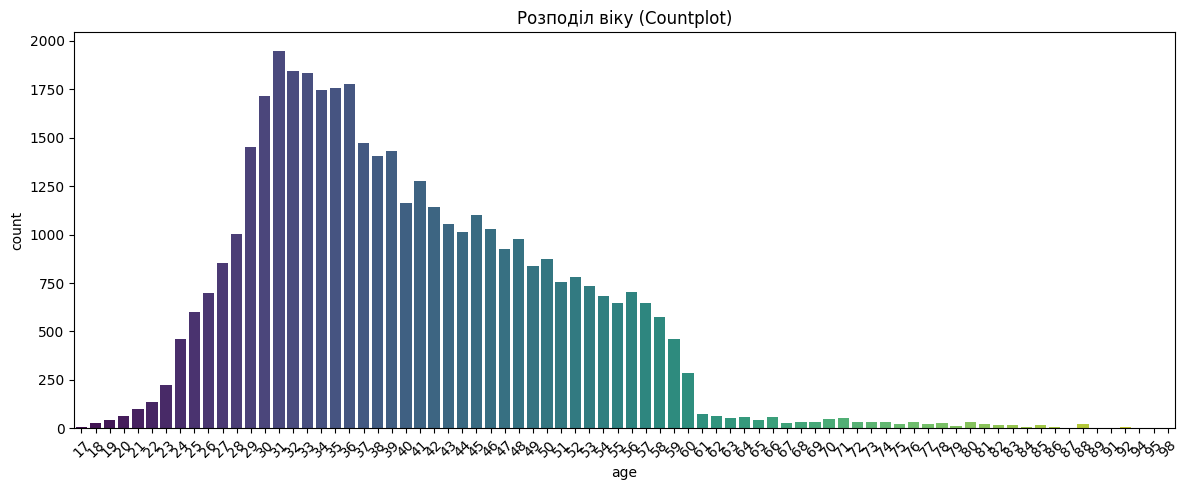

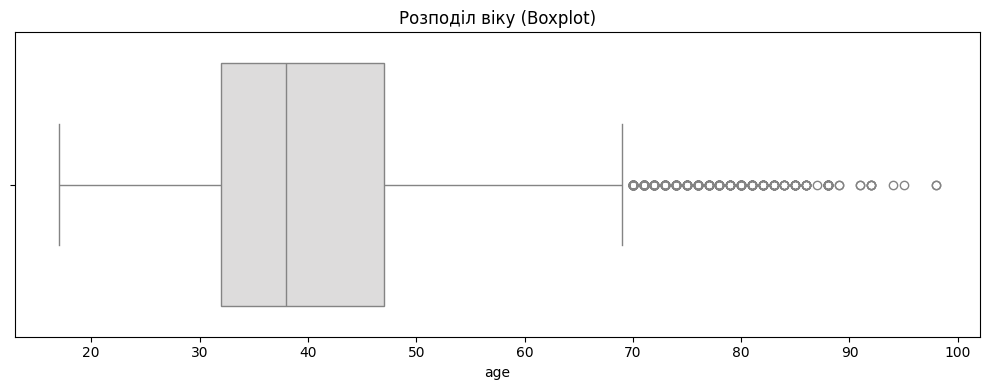

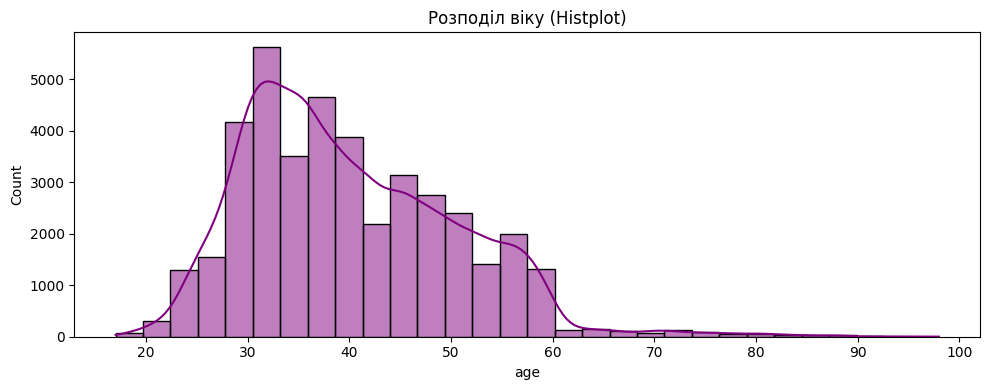

In [5]:
print(f"Max age: {bank_client['age'].max()}")
print(f"Min age: {bank_client['age'].min()}")
print(bank_client['age'].isnull().sum())

plt.figure(figsize=(12, 5))
sns.countplot(x='age', data=bank_client, palette="viridis")
plt.xticks(rotation=45)  
plt.title("Розподіл віку (Countplot)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='age', data=bank_client, palette="coolwarm")
plt.title("Розподіл віку (Boxplot)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(bank_client['age'], kde=True, bins=30, color="purple")
plt.title("Розподіл віку (Histplot)")
plt.tight_layout()
plt.show()

**Висновки з 1-4 завдання (детальні)**

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [7]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame, column: str, low_percentile: int, high_percentile: int) -> pd.DataFrame:
    if df[column].dtype == 'category':
        df[column] = df[column].astype(float) 
    
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    return outliers

outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)
print(outliers)


       age      job  marital education  default housing loan
38452   98  retired  married  basic.4y  unknown     yes   no
38455   98  retired  married  basic.4y  unknown     yes   no


In [8]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

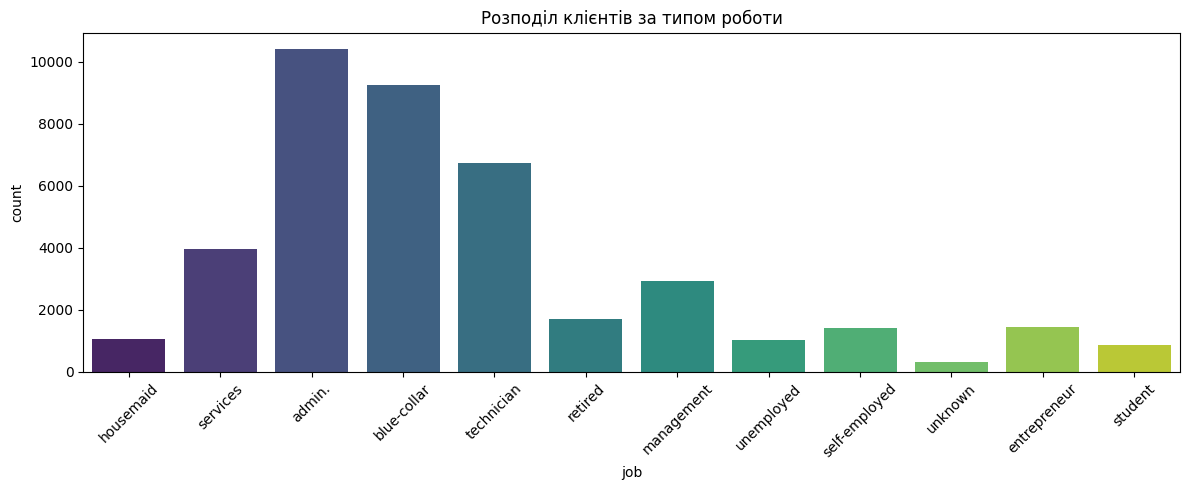

In [9]:
plt.figure(figsize=(12, 5))
sns.countplot(x='job', data=bank_client, palette="viridis")
plt.xticks(rotation=45)  
plt.title("Розподіл клієнтів за типом роботи")
plt.tight_layout()
plt.show()

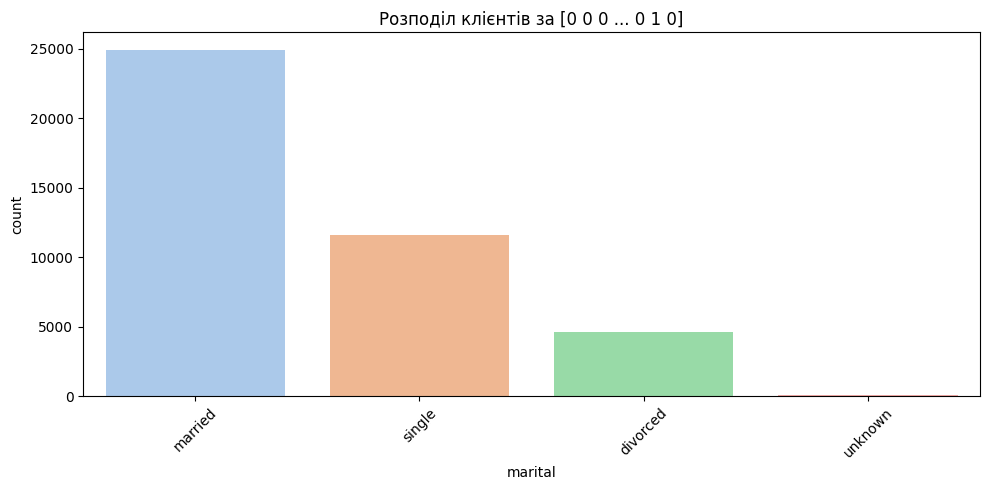

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='marital', data=bank_client, palette="pastel")
plt.xticks(rotation=45)
plt.title(f"Розподіл клієнтів за {target}")
plt.tight_layout()
plt.show()

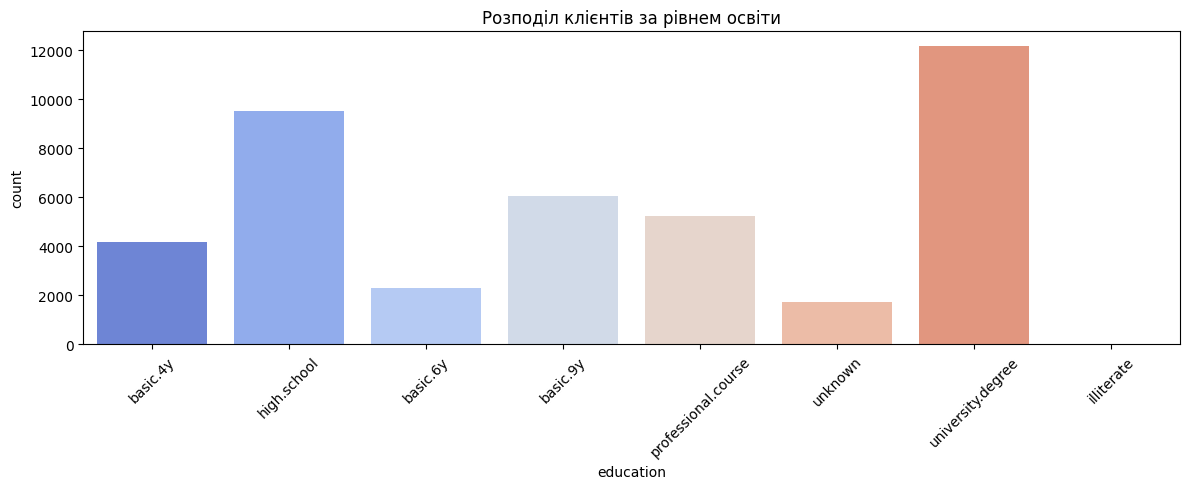

In [9]:
plt.figure(figsize=(12, 5))
sns.countplot(x='education', data=bank_client, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Розподіл клієнтів за рівнем освіти")
plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

1.   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

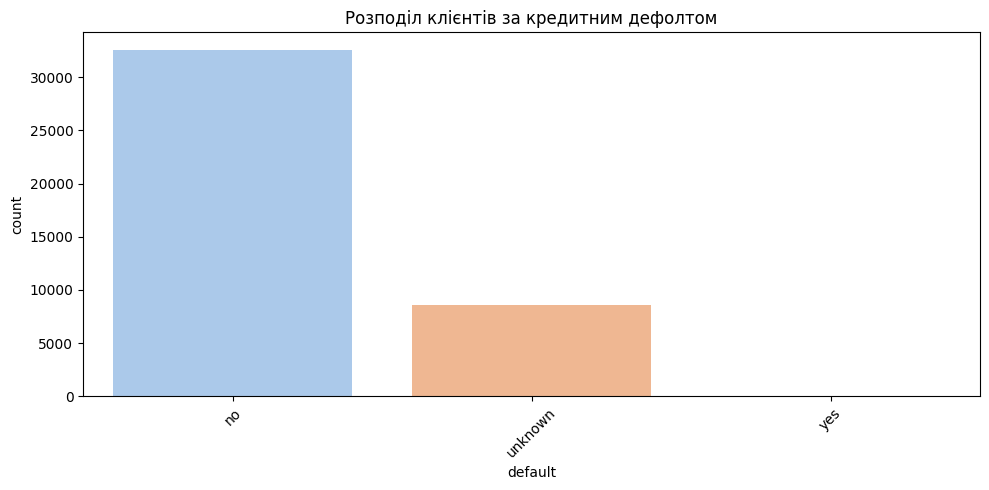

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='default', data=bank_client, palette="pastel")
plt.xticks(rotation=45)
plt.title("Розподіл клієнтів за кредитним дефолтом")
plt.tight_layout()
plt.show()


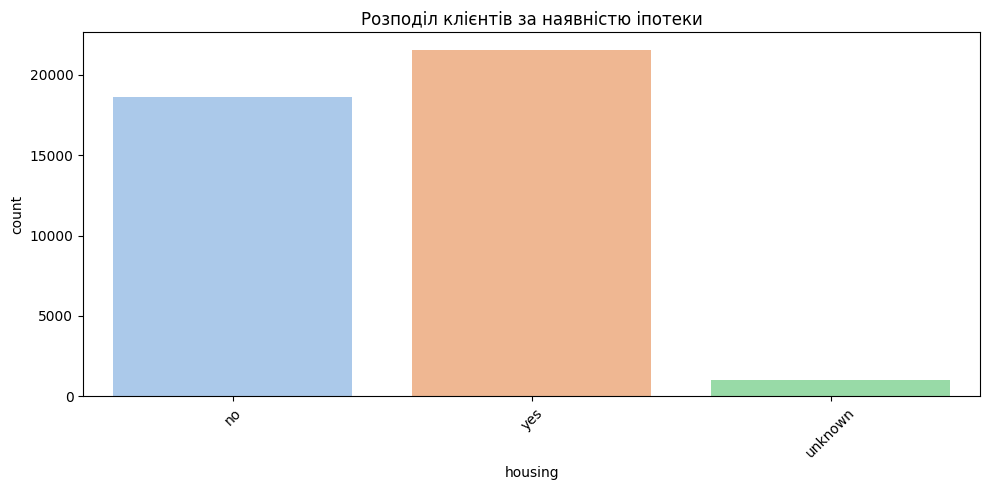

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='housing', data=bank_client, palette="pastel")
plt.xticks(rotation=45)
plt.title("Розподіл клієнтів за наявністю іпотеки")
plt.tight_layout()
plt.show()


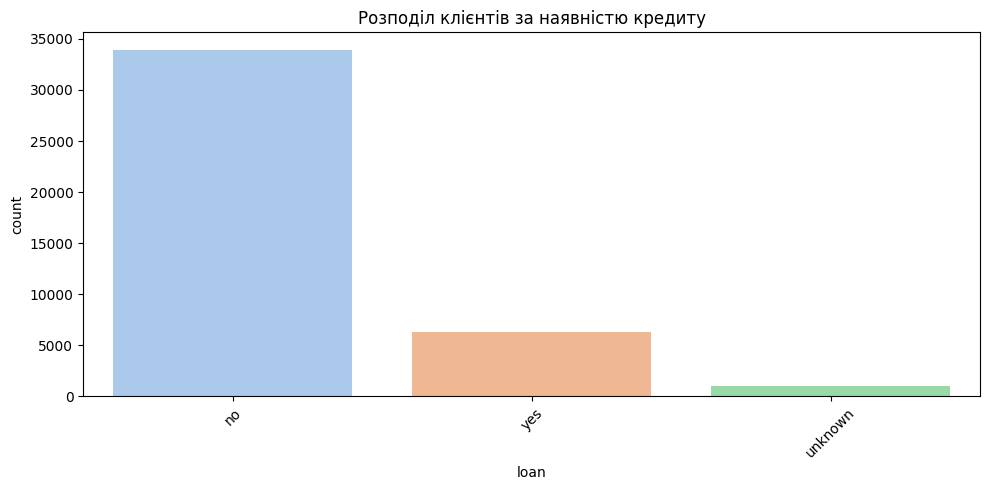

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='loan', data=bank_client, palette="pastel")
plt.xticks(rotation=45)
plt.title("Розподіл клієнтів за наявністю кредиту")
plt.tight_layout()
plt.show()


**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [12]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
    return df

In [13]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [14]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    dataframe[age_col] = pd.cut(dataframe[age_col], bins=[0, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])
    return dataframe

In [15]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [16]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration']]
print(bank_relat.isnull().sum())

contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [17]:
print(bank_relat['contact'].unique())
print(bank_relat['month'].unique())
print(bank_relat['day_of_week'].unique())

['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



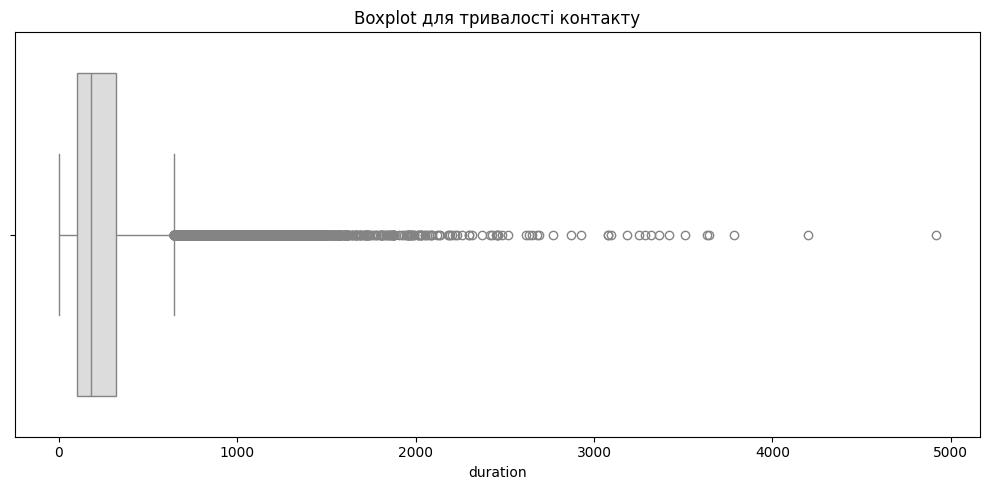

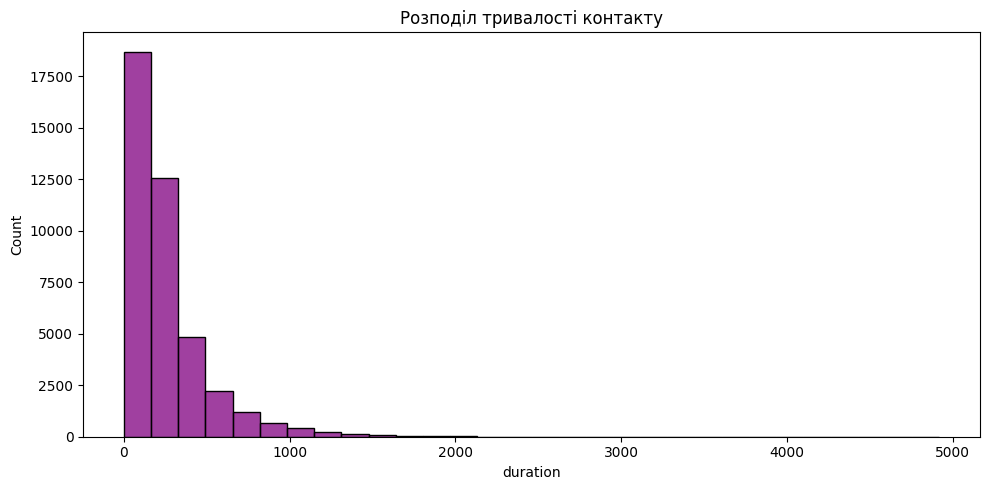

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='duration', data=bank_relat, palette="coolwarm")
plt.title("Boxplot для тривалості контакту")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(bank_relat['duration'], kde=False, bins=30, color="purple")
plt.title("Розподіл тривалості контакту")
plt.tight_layout()
plt.show()


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [18]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [19]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    dataframe[duration_col] = pd.cut(dataframe[duration_col], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    return dataframe

In [20]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [21]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [22]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [23]:
bank_other = encode_categorical_columns(bank_other, ['poutcome'])

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [24]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)


**Завдання 19** Провести ділення вибірки

In [25]:
def prepare_data_for_training(X: pd.DataFrame, target: pd.Series, test_size: float, n_splits: int, random_state: int):
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test, k_fold

#перехресна перевірка (KFold) з 10-ма фолдами (n_splits=10)

In [26]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [27]:
def scale_the_data(X_train: pd.DataFrame, X_test: pd.DataFrame):
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    return X_train, X_test

X_train, X_test = scale_the_data(X_train, X_test)

#standard
#Віднімає середнє значення
#Ділить на стандартне відхилення
#Робить розподіл із середнім 0 і стандартним відхиленням 1.

In [28]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [30]:

from sklearn.impute import SimpleImputer
print("Кількість пропущених значень у X_train до обробки:", np.isnan(X_train).sum())
print("Кількість пропущених значень у X_test до обробки:", np.isnan(X_test).sum())

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Кількість пропущених значень у X_train після обробки:", np.isnan(X_train).sum())
print("Кількість пропущених значень у X_test після обробки:", np.isnan(X_test).sum())

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)

Кількість пропущених значень у X_train до обробки: 0
Кількість пропущених значень у X_test до обробки: 0
Кількість пропущених значень у X_train після обробки: 0
Кількість пропущених значень у X_test після обробки: 0
[[7113  166]
 [ 626  333]]
90.0


## k-NN

k=1 86.95% (+/- 0.62%)
k=2 89.50% (+/- 0.58%)
k=3 89.32% (+/- 0.59%)
k=4 89.91% (+/- 0.58%)
k=5 89.98% (+/- 0.63%)
k=6 90.05% (+/- 0.55%)
k=7 90.16% (+/- 0.66%)
k=8 90.26% (+/- 0.64%)
k=9 90.27% (+/- 0.64%)
k=10 90.31% (+/- 0.66%)
k=11 90.33% (+/- 0.61%)
k=12 90.24% (+/- 0.64%)
k=13 90.47% (+/- 0.65%)
k=14 90.40% (+/- 0.62%)
k=15 90.40% (+/- 0.65%)
k=16 90.36% (+/- 0.63%)
k=17 90.41% (+/- 0.65%)
k=18 90.33% (+/- 0.66%)
k=19 90.36% (+/- 0.68%)
k=20 90.32% (+/- 0.69%)
k=21 90.37% (+/- 0.73%)
k=22 90.36% (+/- 0.72%)
k=23 90.37% (+/- 0.64%)
k=24 90.33% (+/- 0.70%)
k=25 90.37% (+/- 0.71%)
The optimal number of neighbors is 13 with 90.5% accuracy


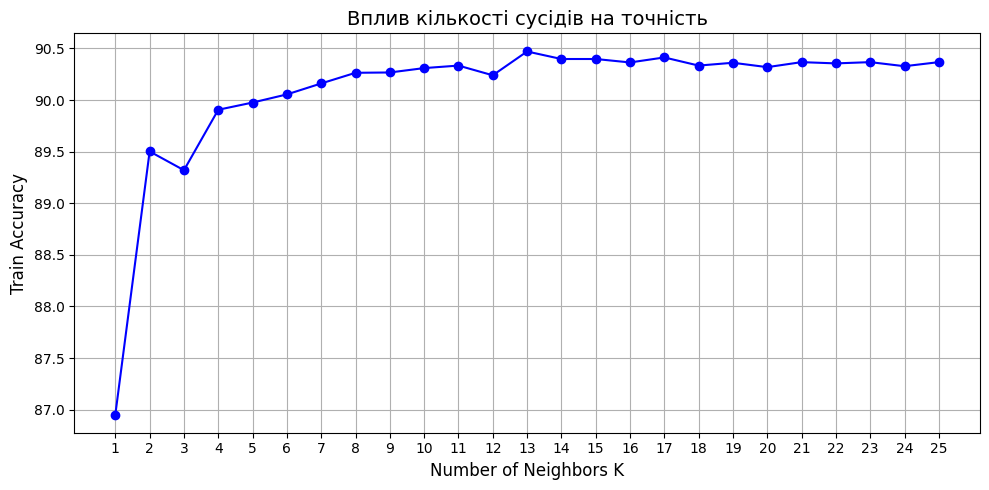

In [31]:
neighbors = np.arange(1, 26) 
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean() * 100:.2f}% (+/- {scores.std() * 100:.2f}%)")

optimal_k = neighbors[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k} with {cv_scores[optimal_k-1]:.1f}% accuracy")

# cross_val_score – крос-валідація з k_fold на X_train і y_train


plt.figure(figsize=(10, 5))
plt.plot(neighbors, cv_scores, marker="o", linestyle="-", color="blue")
plt.xlabel("Number of Neighbors K", fontsize=12)
plt.ylabel("Train Accuracy", fontsize=12)
plt.title("Вплив кількості сусідів на точність", fontsize=14)
plt.xticks(neighbors)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred), 2) * 100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

#.predict(X_test) – модель KNN робить прогноз для тестових даних.

#knnpred – список передбачених значень для y_test

[[7130  149]
 [ 664  295]]
90.0


## Логістична Регресія

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LOGCV = cross_val_score(logmodel, X_train, y_train, cv=k_fold, scoring='accuracy').mean()

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNNCV = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy').mean()

models = pd.DataFrame({
    'Models': ['Logistic Regression', 'k-NN'],
    'Score': [LOGCV, KNNCV]
})

print(models.sort_values(by='Score', ascending=False))

                Models     Score
0  Logistic Regression  0.908103
1                 k-NN  0.904704


**Висновки по моделям (детальні)**